In [16]:
import numpy as np

import matplotlib.pyplot as plt

from WDM.code.discrete_wavelet_transform.WDM import WDM_transform


# Wavelet transform (exact)

In [2]:
wdm = WDM_transform(dt=1., Nf=16, N=512, q=5)

x = np.random.randn(wdm.N) # white noise

w = wdm.forward_transform_exact(x)

The `WDM_transform` class contains a method `.time_frequency_plot` for plotting these wavelet coefficients.

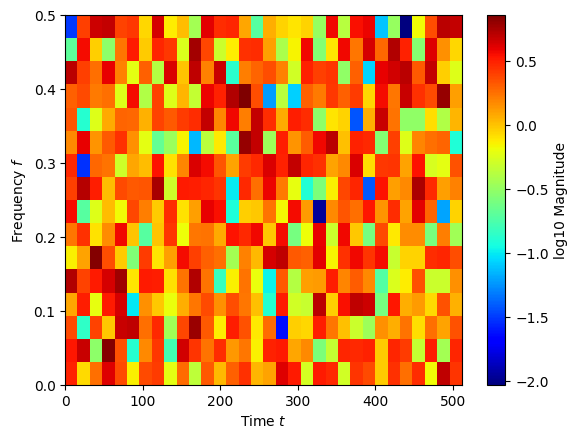

In [3]:
wdm.time_frequency_plot(w, scale='log')

In [4]:
x_ = wdm.inverse_transform_exact(w)

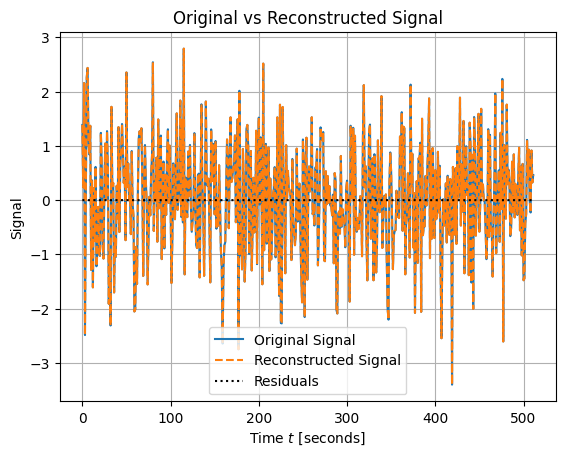

In [5]:
plt.plot(wdm.times, x, label='Original Signal')
plt.plot(wdm.times, x_, label='Reconstructed Signal', linestyle='--')
plt.plot(wdm.times, x-x_, label='Residuals', linestyle=':', c='k')

plt.xlabel('Time $t$ [seconds]')
plt.ylabel('Signal')
plt.title('Original vs Reconstructed Signal')
plt.legend()
plt.grid()
plt.show()

# Wavelet transform (truncated)

In [6]:
wdm = WDM_transform(dt=1., Nf=16, N=512, q=5)

x = np.random.randn(wdm.N) # white noise

w = wdm.forward_transform_exact(x)

W = wdm.forward_transform_truncated(x)


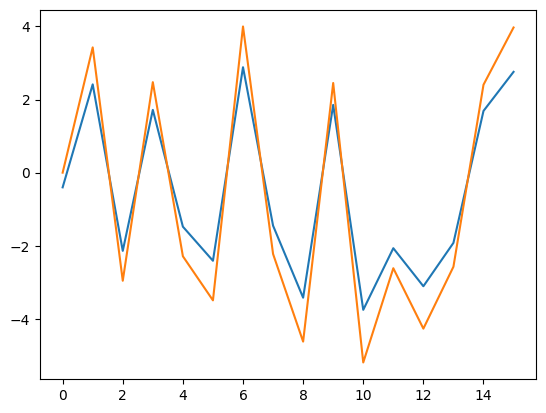

In [14]:
plt.plot(w[1,:])
plt.plot(W[1,:]/np.sqrt(np.pi))
plt.show()

# Wavelet transform (fast)

# Demonstrate padding

In [19]:
from WDM.code.utils.utils import next_multiple

In [ ]:
x = np.random.randn(10) # white noise

Nf = 16
N = next_multiple(len(x), 2*Nf)

x_padded, mask = wdm.pad_signal(x)

wdm = WDM_transform(dt=1., Nf=Nf, N=N)

print("Original signal length:", len(x))
print("Padded signal length:", len(x_padded))

x-x_padded[mask]


Original signal length: 10
Padded signal length: 32


Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)